### importing libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing the dataset

In [57]:
dataset = pd.read_csv('Mall_Customers.csv')

In [58]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Selecting datapoints

In [60]:
X = dataset.iloc[:, [3, 4]].values

### Elbow method for finding k

In [61]:
from sklearn.cluster import KMeans
wcss = []

In [62]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

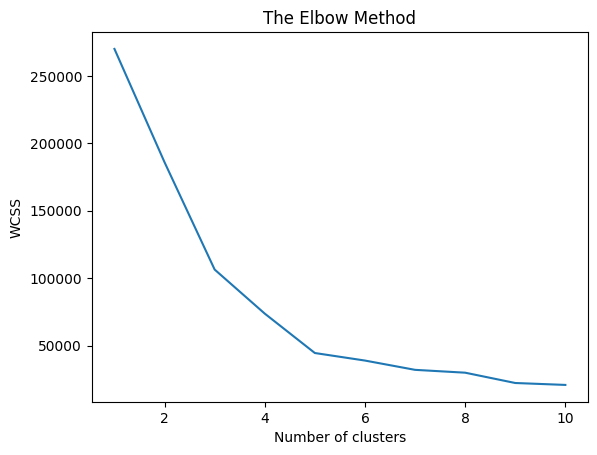

In [63]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Assigning k value from the obtained graph

In [64]:
kmeandmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [65]:
y = kmeandmodel.fit_predict(X)

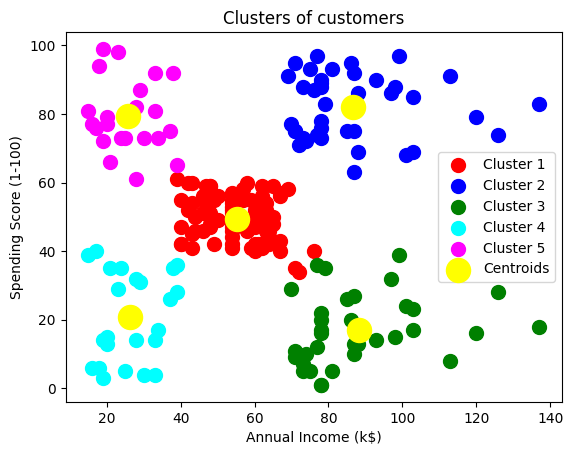

In [66]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeandmodel.cluster_centers_[:, 0], kmeandmodel.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()